<div style="text-align: center;"> <h3>Exploratory Data Analysis</h3>
<h5>Formative Assessment 2</h5>
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

## First Item

In [2]:
library(tidyverse)
library(ggplot2)
library(tidyr)
options(scipen=0)
library(readr)
library(ggthemes)
library(lspline)
library(knitr)
library(splines)

In [20]:
df <- as_tibble(read.csv("cytof_one_experiment.csv"))
print(df)

# A tibble: 50,000 x 35
    NKp30 KIR3DL1  NKp44 KIR2DL1 GranzymeB   CXCR6  CD161 KIR2DS4 NKp46   NKG2D
    <dbl>   <dbl>  <dbl>   <dbl>     <dbl>   <dbl>  <dbl>   <dbl> <dbl>   <dbl>
 1  0.188  3.62   -0.561  -0.294     2.48  -0.145  -0.315  1.94   4.08   2.62  
 2  1.03   1.70   -0.289  -0.480     3.26  -0.0339 -0.411  3.80   3.73  -0.483 
 3  3.00   6.14    1.90    0.482     4.28   1.95   -0.502 -0.320  4.56  -0.507 
 4  4.30  -0.221   0.243  -0.483     3.35   0.926   3.88  -0.170  4.48   1.93  
 5 -0.439 -0.504  -0.153   0.751     3.19  -0.0589  1.09  -0.0503 0.838 -0.458 
 6  2.09  -0.399   3.46   -0.520     4.35  -0.364  -0.571 -0.450  4.06   3.43  
 7 -0.613 -0.117  -0.451   3.55      1.54  -0.414   0.725 -0.0674 2.67  -0.0838
 8 -0.341 -0.253  -0.459   2.90     -0.545 -0.612  -0.128  2.79   0.726  2.10  
 9  2.31  -0.364  -0.573   3.84      2.92   2.46    2.25  -0.376  4.33  -0.0168
10  3.48  -0.0282 -0.182   4.20      4.74   0.695   5.08   4.19   4.54   2.16  
# i 49,990 more 

In [ ]:
df_longer <- pivot_longer(df, colnames(df), names_to = "type", values_to = "amount")
med_mad <- df_longer %>%
    group_by(type) %>%
    summarise(median = median(amount), mad = mad(amount))

In [4]:
df_longer <- pivot_longer(df, colnames(df), names_to = "type", values_to = "amount")
print(df_longer)

# A tibble: 1,750,000 x 2
   type      amount
   <chr>      <dbl>
 1 NKp30      0.188
 2 KIR3DL1    3.62 
 3 NKp44     -0.561
 4 KIR2DL1   -0.294
 5 GranzymeB  2.48 
 6 CXCR6     -0.145
 7 CD161     -0.315
 8 KIR2DS4    1.94 
 9 NKp46      4.08 
10 NKG2D      2.62 
# i 1,749,990 more rows


In [5]:
med_mad <- df_longer %>%
    group_by(type) %>%
    summarise(median = median(amount), mad = mad(amount))
print(med_mad)

# A tibble: 35 x 3
   type    median   mad
   <chr>    <dbl> <dbl>
 1 CD107a -0.122  0.609
 2 CD16    5.12   0.874
 3 CD161   0.726  1.69 
 4 CD2     3.95   1.68 
 5 CD4    -0.204  0.395
 6 CD56    5.71   0.998
 7 CD57    3.07   1.99 
 8 CD69    4.59   1.02 
 9 CD8     2.40   2.29 
10 CXCR6  -0.0581 0.727
# i 25 more rows


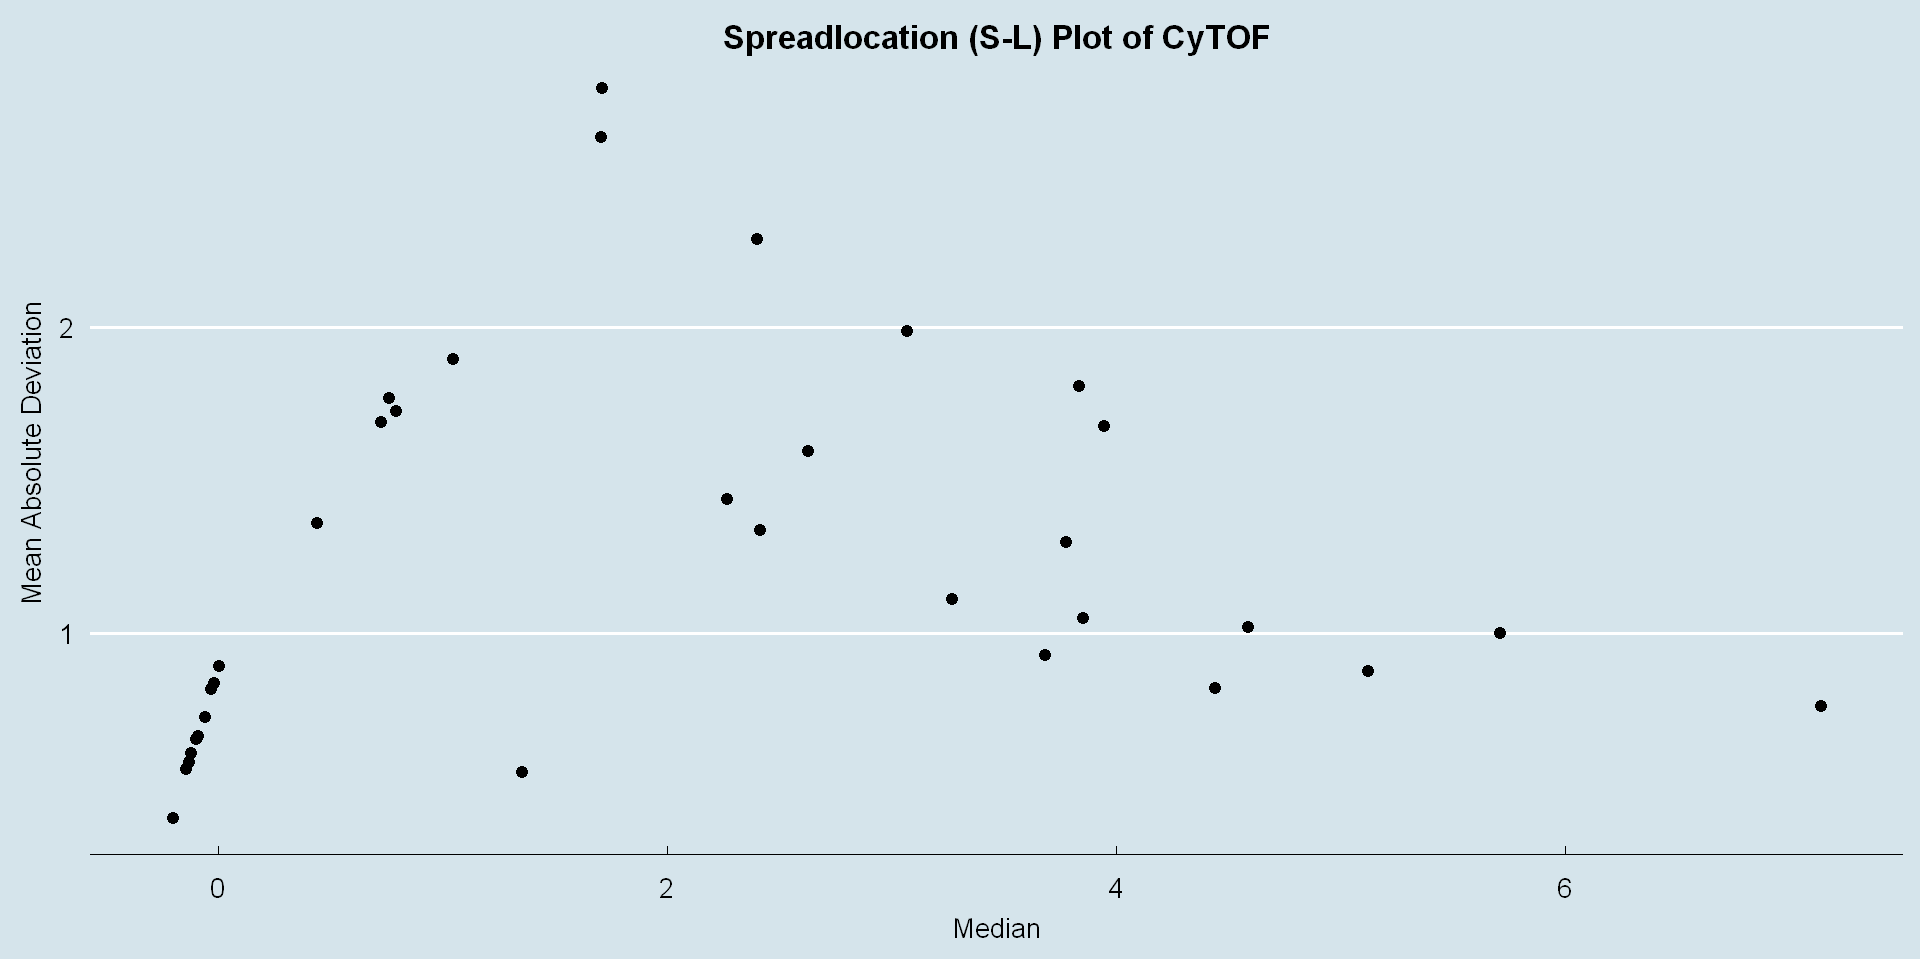

In [6]:
options(repr.plot.width = 16, repr.plot.height =8) 

med_mad %>%
ggplot(aes(x=median, y=mad)) +
geom_point(size=3) +
ggtitle("Spreadlocation (S-L) Plot of CyTOF") +
xlab("Median") +
ylab("Mean Absolute Deviation") + 
theme_economist() +
theme(
    plot.title = element_text(hjust = 0.5, size=20),
    axis.title = element_text(size = 16),
    axis.text= element_text(size = 16),
    axis.title.x = element_text(margin = margin(t = 10)),  
    axis.title.y = element_text(margin = margin(r = 10)))

At first glance, the `Spreadlocation (S-L) Plot of CyTOF` seem to have some sort of triangular relationship the peaks around *median = 1.7*. For that reason we can use *piece-wise linear spline* to better visualize the relationship between `Median` and `Mean Absolute Deviation`. 

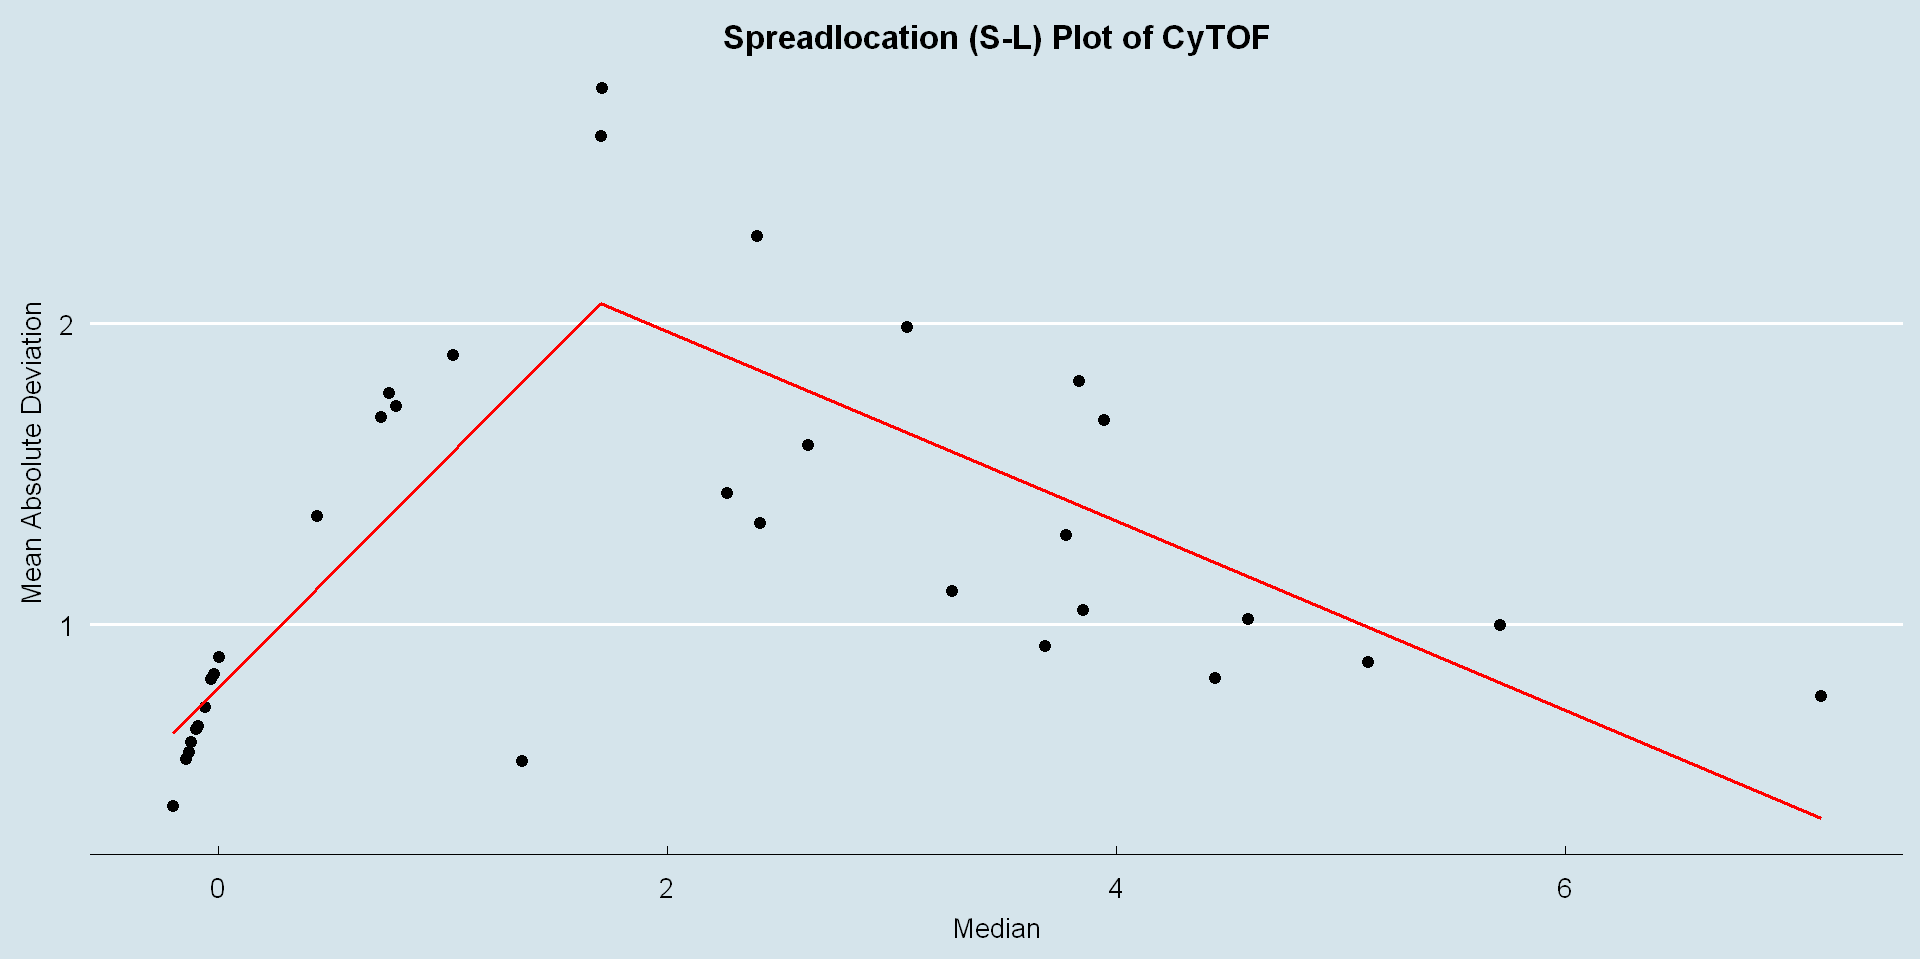

In [9]:
options(repr.plot.width = 16, repr.plot.height =8) 
knot <- 1.7
model <- lm(mad ~ lspline(median, knot), data = med_mad)

coefs <- coef(model)
slope1 <- coefs[2]  
slope2 <- coefs[3] 
intercept <- coefs[1]

y_knot <- intercept + slope1 * knot  

x_min <- min(med_mad$median)
x_max <- max(med_mad$median)

y_start <- intercept + slope1 * x_min
y_end <- y_knot + slope2 * (x_max - knot)

med_mad %>%
ggplot(aes(x=median, y=mad)) +
geom_point(size=3) +
geom_segment(aes(x = x_min, y = y_start, xend = knot, yend = y_knot), 
               color = "red", linewidth = 1) + 
geom_segment(aes(x = knot, y = y_knot, xend = x_max, yend = y_end), 
               color = "red", linewidth = 1) +
ggtitle("Spreadlocation (S-L) Plot of CyTOF") +
xlab("Median") +
ylab("Mean Absolute Deviation") + 
theme_economist() +
theme(
    plot.title = element_text(hjust = 0.5, size=20),
    axis.title = element_text(size = 16),
    axis.text= element_text(size = 16),
    axis.title.x = element_text(margin = margin(t = 10)),  
    axis.title.y = element_text(margin = margin(r = 10)))

With data splined into two knot at *median=1.7*, it becomes clear that at first knot, the `median` and `mean absolute deviation` have positive relationship while beyond, the relationship becomes negative.

Of course, we could calculate this numerically by calculating for correlation of (1) overall data, (2) first knot at median below 1.9, and (3) second knot a complement of the first knot. 

In [8]:
cor_ovr <- cor(med_mad$median, med_mad$mad)
knot_one <- filter(med_mad,median < knot) 
knot_two <- filter(med_mad,median >= knot) 
cor_one <- cor(knot_one$median, knot_one$mad)
cor_two <- cor(knot_two$median, knot_two$mad)

tibble(ovr_cor = cor_ovr, knot_1_cor = cor_one, knot_2_cor = cor_two)

ovr_cor,knot_1_cor,knot_2_cor
<dbl>,<dbl>,<dbl>
0.1542416,0.6697454,-0.7454767


## Second Item

In [13]:
load("example_gymnastics_2.rda")
example_gymnastics_2

country,vault_2012,floor_2012,vault_2016,floor_2016
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
United States,48.132,45.366,46.866,45.999
Russia,46.366,41.599,45.733,42.032
China,44.266,40.833,44.332,42.066


country, event, year, and score

In [19]:
gymnastics_longer <- example_gymnastics_2 %>% 
pivot_longer(names(example_gymnastics_2[-1]), names_sep = "_", names_to = c("event", "year"), values_to = "score")
gymnastics_longer

country,event,year,score
<chr>,<chr>,<chr>,<dbl>
United States,vault,2012,48.132
United States,floor,2012,45.366
United States,vault,2016,46.866
United States,floor,2016,45.999
Russia,vault,2012,46.366
Russia,floor,2012,41.599
Russia,vault,2016,45.733
Russia,floor,2016,42.032
China,vault,2012,44.266


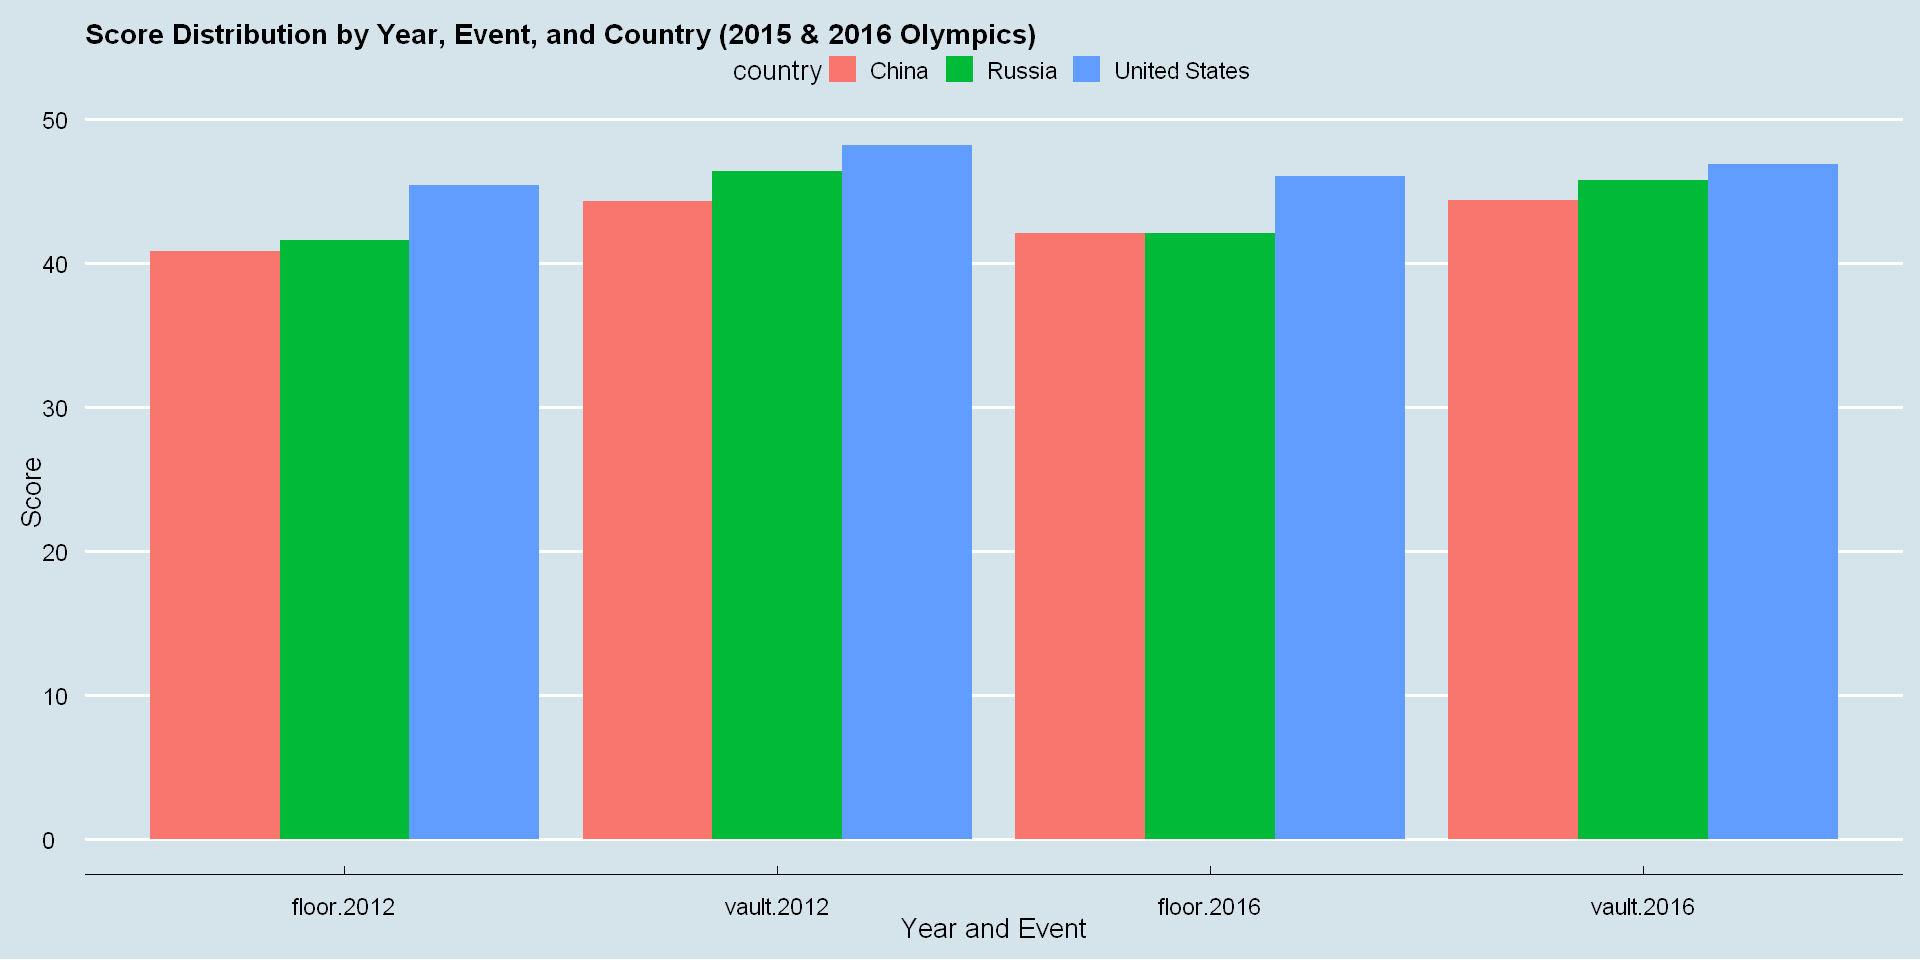

In [54]:
ggplot(data = gymnastics_longer, aes(x = interaction(event, year), y = score, fill = country)) +
  geom_bar(stat = "identity", position = "dodge") + 
  labs(
    x = "Year and Event",
    y = "Score",
    title = "Score Distribution by Year, Event, and Country (2015 & 2016 Olympics)"
  ) +
  theme_economist() +
  theme(
    axis.text = element_text(size=14),
    axis.title = element_text(size=16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16))